### Dataset - Normalized with Min-max method / With Redshift

#### Random Forest algorithm 

In [1]:
import pandas as pd # for Dataframe manupulation
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for data visualization
import numpy as np # for arrays manipulation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc 
# to import evaluation metrices

In [2]:
df_mm_r = pd.read_csv("D:/Academic/MSc_Data_Science/Course/8.Technology Dissertation/4. Dissertation/Datasets/sgq_classification_mm_r.csv")

In [3]:
df_mm_r

,alpha,delta,u,g,r,i,z,redshift,class
0,0.472803,0.677462,0.998994,0.999092,0.527008,0.434177,0.999009,0.080456,0
1,0.303044,0.572530,0.998695,0.998925,0.527996,0.489885,0.999222,0.001420,0
2,0.005302,0.362428,0.998932,0.999082,0.555528,0.516271,0.999187,0.051001,0
3,0.474755,0.380538,0.998767,0.998804,0.388109,0.333769,0.998792,0.023418,0
4,0.595306,0.213180,0.998691,0.998716,0.350548,0.302683,0.998723,0.020127,0
...,...,...,...,...,...,...,...,...,...
56878,0.570563,0.572008,0.998900,0.999043,0.558451,0.497201,0.999193,0.001375,2
56879,0.036093,0.193240,0.999066,0.999016,0.481001,0.380677,0.998867,0.001414,2
56880,0.560834,0.539862,0.998664,0.998771,0.407412,0.363928,0.998888,0.001360,2
56881,0.016374,0.528663,0.998509,0.998588,0.299670,0.277048,0.998685,0.001411,2


In [4]:
x = df_mm_r.drop("class",axis='columns')
x.head()

,alpha,delta,u,g,r,i,z,redshift
0,0.472803,0.677462,0.998994,0.999092,0.527008,0.434177,0.999009,0.080456
1,0.303044,0.572530,0.998695,0.998925,0.527996,0.489885,0.999222,0.001420
2,0.005302,0.362428,0.998932,0.999082,0.555528,0.516271,0.999187,0.051001
3,0.474755,0.380538,0.998767,0.998804,0.388109,0.333769,0.998792,0.023418
4,0.595306,0.213180,0.998691,0.998716,0.350548,0.302683,0.998723,0.020127


In [5]:
y = df_mm_r["class"]
y

0        0
1        0
2        0
3        0
4        0
        ..
56878    2
56879    2
56880    2
56881    2
56882    2
Name: class, Length: 56883, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42, stratify=y)

In [7]:
from sklearn.ensemble import RandomForestClassifier

# initializing model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [8]:
y_pred = model_rf.predict(x_test)


In [9]:
from sklearn.metrics import confusion_matrix

# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1835,   45,   16],
       [  95, 1801,    0],
       [   1,    0, 1896]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

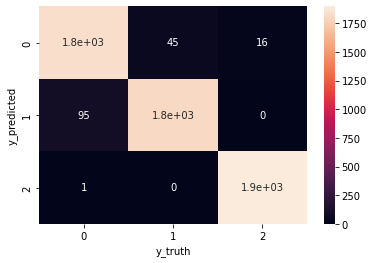

In [10]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [11]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9724028827561961
Precision: 0.9725131980862182
Recall: 0.9723981236195726
F1 Score: 0.9723664790845409


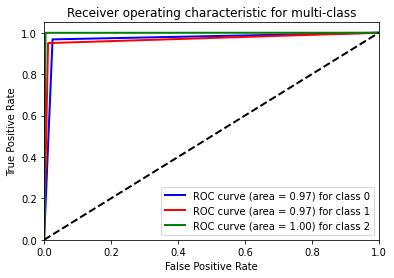

In [12]:
# Plot ROC curve for each class separately

n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_test_one_vs_all = np.array([1 if y == i else 0 for y in y_test])
    y_pred_one_vs_all = np.array([1 if y == i else 0 for y in y_pred])
    fpr[i], tpr[i], _ = roc_curve(y_test_one_vs_all, y_pred_one_vs_all)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves on the same plot
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple'] # add more colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

#### Support Vector Machine (SVM) algorithm

In [13]:
from sklearn.svm import SVC #importing SVC class

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42,stratify=y)

# training the SVM model
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(x_train, y_train)


SVC(C=1, kernel='linear')

In [14]:
y_pred = model_svm.predict(x_test)

In [15]:
# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1561,   53,  282],
       [ 187, 1703,    6],
       [   0,    0, 1897]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

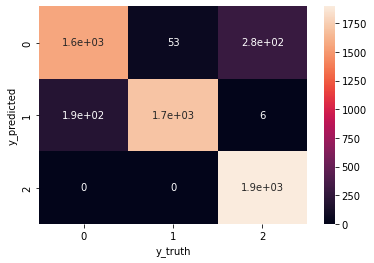

In [16]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [17]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9071893127087362
Precision: 0.9103435274330224
Recall: 0.9071729957805909
F1 Score: 0.9062789408689218


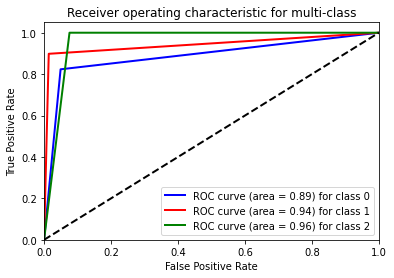

In [18]:
# Plot ROC curve for each class separately

n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_test_one_vs_all = np.array([1 if y == i else 0 for y in y_test])
    y_pred_one_vs_all = np.array([1 if y == i else 0 for y in y_pred])
    fpr[i], tpr[i], _ = roc_curve(y_test_one_vs_all, y_pred_one_vs_all)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves on the same plot
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple'] # add more colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

#### Extremely Randomized Trees (ERT) algorithm

In [19]:
from sklearn.ensemble import ExtraTreesClassifier #importing extra trees classifier

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42,stratify=y)

# initializing the ERT model and fit it to the training data
model_ert = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2)
model_ert.fit(x_train, y_train)

ExtraTreesClassifier()

In [20]:
y_pred = model_ert.predict(x_test)

In [21]:
# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1835,   38,   23],
       [ 105, 1790,    1],
       [   0,    0, 1897]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

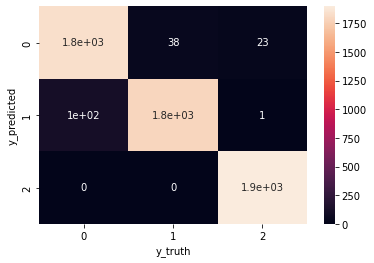

In [22]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [23]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9706451045878011
Precision: 0.9708650165055684
Recall: 0.9706399437412095
F1 Score: 0.9705905478525526


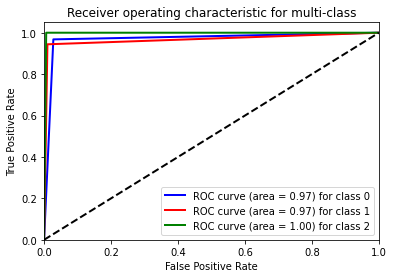

In [24]:
# plotting ROC curve for each class separately

n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_test_one_vs_all = np.array([1 if y == i else 0 for y in y_test])
    y_pred_one_vs_all = np.array([1 if y == i else 0 for y in y_pred])
    fpr[i], tpr[i], _ = roc_curve(y_test_one_vs_all, y_pred_one_vs_all)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves on the same plot
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple'] # add more colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

####  Decision Tree algorithm

In [25]:
from sklearn.tree import DecisionTreeClassifier #importing decision tree module

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42,stratify=y)

# initializing the decision tree model and fit it to the training data
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [26]:
y_pred = model_dt.predict(x_test)

In [27]:
# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1774,  113,    9],
       [ 111, 1785,    0],
       [   9,    1, 1887]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

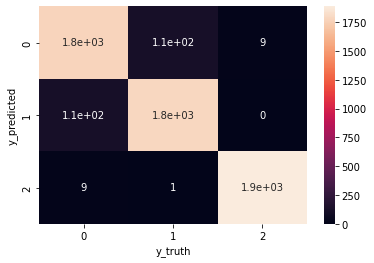

In [28]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [29]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9572859905079979
Precision: 0.957287865478488
Recall: 0.9572794077850362
F1 Score: 0.9572833307273808


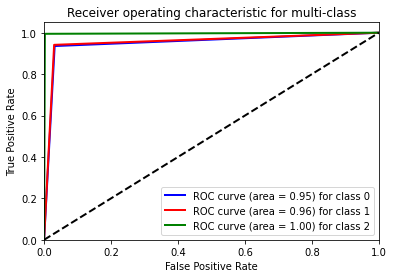

In [30]:
# plotting ROC curve for each class separately

n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_test_one_vs_all = np.array([1 if y == i else 0 for y in y_test])
    y_pred_one_vs_all = np.array([1 if y == i else 0 for y in y_pred])
    fpr[i], tpr[i], _ = roc_curve(y_test_one_vs_all, y_pred_one_vs_all)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves on the same plot
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple'] # add more colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

#### KNN algorithm

In [31]:
from sklearn.neighbors import KNeighborsClassifier # importing KNN module

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42,stratify=y)

# initializing the knn model and fit it to the training data
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [32]:
y_pred = model_knn.predict(x_test)

In [33]:
# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1727,   45,  124],
       [ 175, 1711,   10],
       [  70,    1, 1826]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

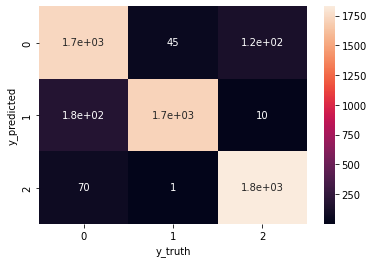

In [34]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [35]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9252944278432061
Precision: 0.9270707706080096
Recall: 0.9252878740360639
F1 Score: 0.9255273762434312


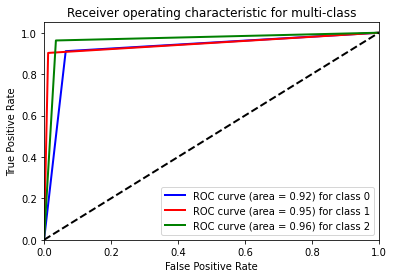

In [36]:
# plotting ROC curve for each class separately

n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_test_one_vs_all = np.array([1 if y == i else 0 for y in y_test])
    y_pred_one_vs_all = np.array([1 if y == i else 0 for y in y_pred])
    fpr[i], tpr[i], _ = roc_curve(y_test_one_vs_all, y_pred_one_vs_all)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves on the same plot
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple'] # add more colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()